In [1]:
import numpy as np

import numpy as np
from sklearn import preprocessing

data1 = np.loadtxt("UnionCom-master/scNMT/Paccessibility_300.txt")
data2 = np.loadtxt("UnionCom-master/scNMT/Pmethylation_300.txt")
data3 = np.loadtxt("UnionCom-master/scNMT/RNA_300.txt")
type1 = np.loadtxt("UnionCom-master/scNMT/type1.txt")
type2 = np.loadtxt("UnionCom-master/scNMT/type2.txt")
type3 = np.loadtxt("UnionCom-master/scNMT/type3.txt")
type1 = type1.astype(np.int)
type2 = type2.astype(np.int)
type3 = type3.astype(np.int)

min_max_scaler = preprocessing.MinMaxScaler()
data3 = min_max_scaler.fit_transform(data3)
print(np.shape(data3))

(1940, 300)


<ipython-input-1-5ddbf312027e>:12: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  type1 = type1.astype(np.int)
<ipython-input-1-5ddbf312027e>:13: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more de

In [2]:
from tsne_mmd import *

In [3]:
X1, X2 = data1, data2
timepoint1, timepoint2 = type1.reshape((type1.shape[0],1)), type2.reshape((type2.shape[0],1))

In [4]:
n_repeat = 1
ts1_list, ts2_list ,time_list = generate_results(X1, X2, n_repeat, no_dims=2, perplexity=100, max_iter=1000)

********** replication:1 ********
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 612...
Computing P-values for point 500 of 612...
Mean value of sigma: 0.500897
Preprocessing the data using PCA...
Computing pairwise distances...
Computing P-values for point 0 of 709...
Computing P-values for point 500 of 709...
Mean value of sigma: 0.521414
Iteration 10: error is 11.500342
Iteration 10: error is 11.770798
Iteration 20: error is 10.027995
Iteration 20: error is 10.082918
Iteration 30: error is 10.018838
Iteration 30: error is 10.024620
Iteration 40: error is 10.029080
Iteration 40: error is 10.054829
Iteration 50: error is 10.018112
Iteration 50: error is 10.049639
Iteration 60: error is 10.016470
Iteration 60: error is 10.046549
Iteration 70: error is 10.022870
Iteration 70: error is 10.048778
Iteration 80: error is 10.018196
Iteration 80: error is 10.048367
Iteration 90: error is 10.015221
Iteration 90: error is 10.048323
Iteratio

In [8]:
import matplotlib.pyplot as plt 
import pylab
def final_embedding_plot(ts1, ts2, c1, c2):
    '''
    plotting 2D embeddings for each of two data-sets besides each other
    
    parameters
    ----------
    ts1 : an object of TSNE class
    ts2 : an object of TSNE class
    c1 : related labels to ts1 data-set
    c2 : related labels to ts2 data-set
        
    '''
    plt.figure(figsize=(30, 10), dpi=80)  # create a plot figure
    
    x1, x2 = ts1.y2d, ts2.y2d

    plt.subplot(1, 2, 1) # (rows, columns, panel number)
    plt.scatter(x1[:, 0], x1[:, 1], 20, c1)
    plt.subplot(1, 2, 2) # (rows, columns, panel number)
    plt.scatter(x2[:, 0], -x2[:, 1], 20, c2)


def plot_togather(ts1, ts2, c1, c2):
        
    x1, x2 = ts1.y2d, ts2.y2d

    ax = pylab.subplot(111)
    ax.scatter(x1[:, 0], x1[:, 1], 20, c1)
    ax.scatter(x2[:, 0], -x2[:, 1], 20, c2)
    qqqq = ax.figure.show()

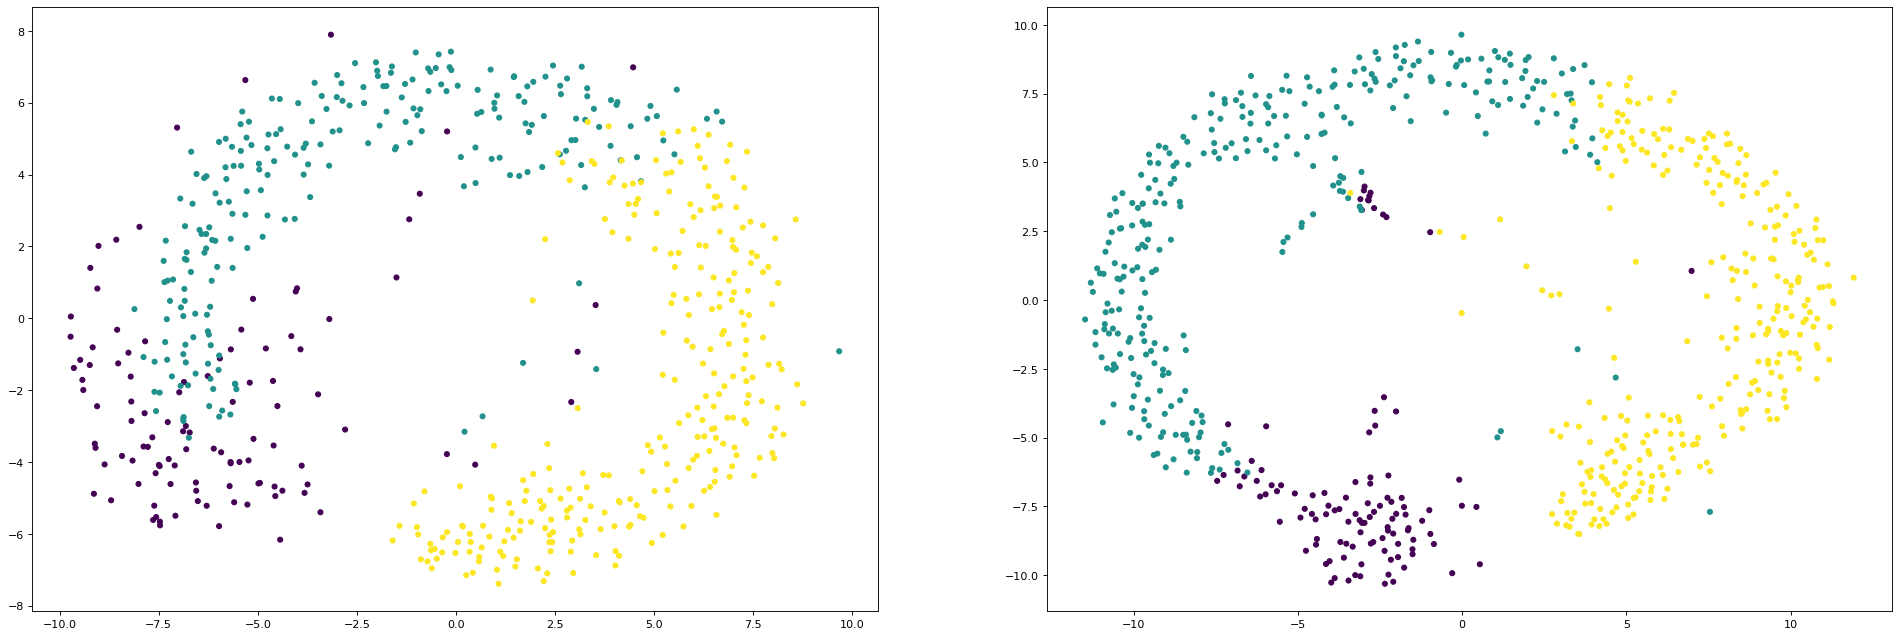

In [9]:
ts1 = ts1_list[0]
ts2 = ts2_list[0]
final_embedding_plot(ts1_list[0], ts2_list[0], timepoint1, timepoint2)

<ipython-input-8-a9ddd74368c8>:32: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  qqqq = ax.figure.show()


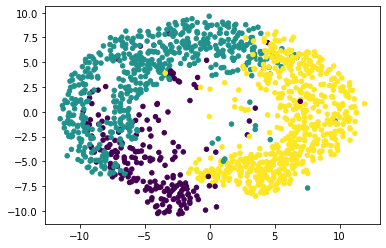

In [10]:
plot_togather(ts1_list[0], ts2_list[0], timepoint1, timepoint2)